## Import Library & Packages

In [1]:
#!pip install --upgrade notebook nbconvert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## Data Import

dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Clustering model directly use Prepared Preprocessed Data

In [17]:
path="https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Customer-Personality-Analysis/main/Data/Prepared%20Data/Preprocessed%20Data.csv?token=GHSAT0AAAAAACMXNOPVYWSCDMSFNWWBC2OQZO2KQLQ"
data = pd.read_csv(path)

In [18]:
data.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,...,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,51823.479831,49.136974,304.337064,26.291853,166.399731,37.561325,27.102954,44.019696,2.321397,4.091316,...,0.504029,0.165622,0.216204,0.001343,0.103402,0.386303,0.214414,0.258281,0.034467,0.000895
std,21209.412805,28.961593,336.669241,39.737595,223.657780,54.666125,41.311159,52.070413,1.914570,2.778538,...,0.500096,0.371824,0.411747,0.036629,0.304551,0.487010,0.410507,0.437787,0.182467,0.029914
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35395.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51301.000000,49.500000,174.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68146.500000,74.000000,504.750000,33.000000,231.750000,50.000000,33.000000,56.000000,3.000000,6.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,157733.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2234 non-null   float64
 1   Recency                  2234 non-null   int64  
 2   MntWines                 2234 non-null   int64  
 3   MntFruits                2234 non-null   int64  
 4   MntMeatProducts          2234 non-null   int64  
 5   MntFishProducts          2234 non-null   int64  
 6   MntSweetProducts         2234 non-null   int64  
 7   MntGoldProds             2234 non-null   int64  
 8   NumDealsPurchases        2234 non-null   int64  
 9   NumWebPurchases          2234 non-null   int64  
 10  NumCatalogPurchases      2234 non-null   int64  
 11  NumStorePurchases        2234 non-null   int64  
 12  NumWebVisitsMonth        2234 non-null   int64  
 13  Complain                 2234 non-null   int64  
 14  Response                

**Drop Total_purchase to prevent data redundancy in the clustering model**

In [20]:
data1 = data.drop(['Total_purchase'], axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2234 non-null   float64
 1   Recency                  2234 non-null   int64  
 2   MntWines                 2234 non-null   int64  
 3   MntFruits                2234 non-null   int64  
 4   MntMeatProducts          2234 non-null   int64  
 5   MntFishProducts          2234 non-null   int64  
 6   MntSweetProducts         2234 non-null   int64  
 7   MntGoldProds             2234 non-null   int64  
 8   NumDealsPurchases        2234 non-null   int64  
 9   NumWebPurchases          2234 non-null   int64  
 10  NumCatalogPurchases      2234 non-null   int64  
 11  NumStorePurchases        2234 non-null   int64  
 12  NumWebVisitsMonth        2234 non-null   int64  
 13  Complain                 2234 non-null   int64  
 14  Response                

## PCA Dimention Reduction

In [32]:
# PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(data1), columns=["col1", "col2", "col3"])

## Select the number of clusters using the elbow method

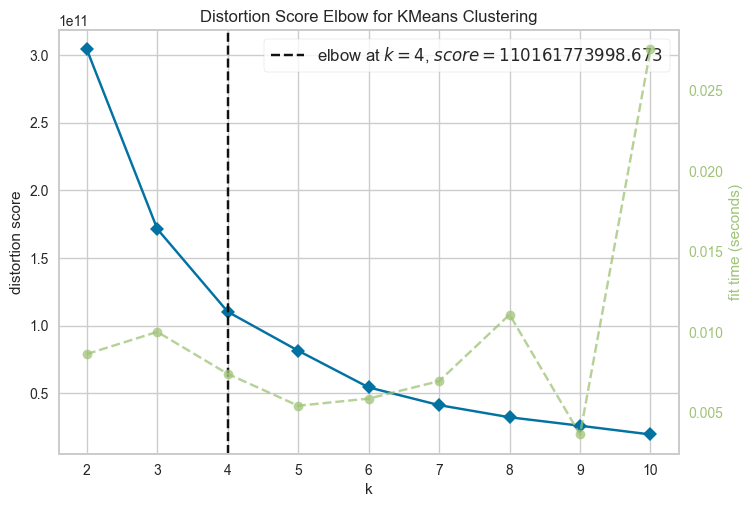

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Clustering with KMean Clustering and visualizing clusters
elbow_m = KElbowVisualizer(KMeans(), k=10)
elbow_m.fit(pca_ds)
elbow_m.show()

## Adapt Kmean's number of clusters --> n = 4

Since we want to compare the clustering models with kmeans model, we are adapting n = 4 from Kmeans.

In [34]:
# Initiating the Agglomerative Clustering model
ac = AgglomerativeClustering(n_clusters=4)
yhat_ac = ac.fit_predict(pca_ds)
ac_score = silhouette_score(pca_ds, yhat_ac)
print("Silhouette Score For Agglomerative Clustering", ac_score)

Silhouette Score For Agglomerative Clustering 0.47686269547440374


In [35]:
kmeans = KMeans(n_clusters=4)

yhat_kmeans = kmeans.fit_predict(pca_ds)

k_score = silhouette_score(pca_ds, yhat_kmeans)
print("Silhouette Score For K-means Clustering:", k_score)

Silhouette Score For K-means Clustering: 0.5456622595892725


In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  

# Fit the model to the data and predict cluster labels
yhat_dbscan = dbscan.fit_predict(pca_ds)

# Check the unique cluster labels assigned by DBSCAN
unique_labels = np.unique(yhat_dbscan)

# give warning if there is only one cluster label
if len(unique_labels) > 1:
    # Calculate the silhouette score for DBSCAN clustering
    dbscan_score = silhouette_score(pca_ds, yhat_dbscan)
    print("Silhouette Score For DBSCAN Clustering:", dbscan_score)
else:
    print("DBSCAN clustering did not assign more than one cluster label.")


DBSCAN clustering did not assign more than one cluster label.


In [37]:
gmm = GaussianMixture(n_components=4)

# Fit the model to the data and predict cluster labels
yhat_gmm = gmm.fit_predict(pca_ds)

# Calculate the silhouette score for GMM clustering
gmm_score = silhouette_score(pca_ds, yhat_gmm)
print("Silhouette Score For Gaussian Mixture Model Clustering:", gmm_score)

Silhouette Score For Gaussian Mixture Model Clustering: 0.14702870081830882


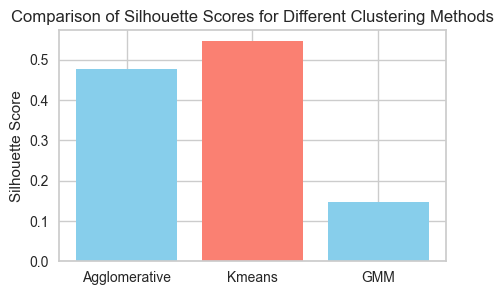

In [38]:
def plot_and_highlight_max(a, b, c):
    heights = [a, b, c]
    
    # Find the maximum value among a, b, c
    max_value = max(a, b, c)
    max_index = heights.index(max_value)  # Index for the highest value
    
    # Colors for the bars
    colors = ['skyblue'] * len(heights)  # Default color for all bars
    colors[max_index] = 'salmon'  # Color the maximum value bar as salmon
    
    labels = ['Agglomerative', 'Kmeans', 'GMM']
    
    # Plot the bar graph with implicit x-values and custom labels
    plt.figure(figsize=(5, 3))
    plt.bar(labels, heights, color=colors)
    plt.xticks(range(len(heights)), labels)
    
    # Set labels and title
    plt.ylabel('Silhouette Score')
    plt.title('Comparison of Silhouette Scores for Different Clustering Methods')

    
    # Show the plot
    plt.show()

plot_and_highlight_max(ac_score, k_score, gmm_score)

## Plot Clusters

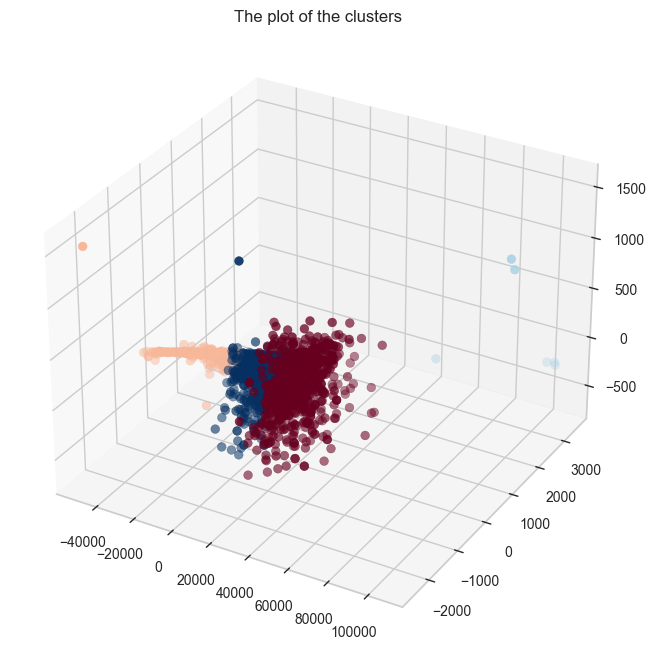

In [39]:
pca_ds["Clusters"] = yhat_kmeans
data["Clusters"] = yhat_kmeans
data1["Clusters"] = yhat_kmeans

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(pca_ds["col1"], pca_ds["col2"], pca_ds["col3"], s=40, c=pca_ds["Clusters"], cmap='RdBu')
ax.set_title("The plot of the clusters")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_61645/3055942101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Clusters", data=data, palette="RdBu")


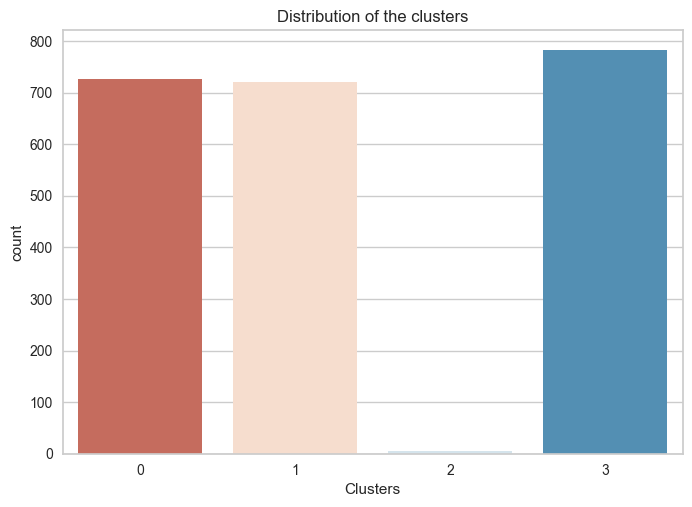

In [40]:
# Distribution of the clusters
sns.countplot(x="Clusters", data=data, palette="RdBu")
plt.title("Distribution of the clusters")
plt.show()

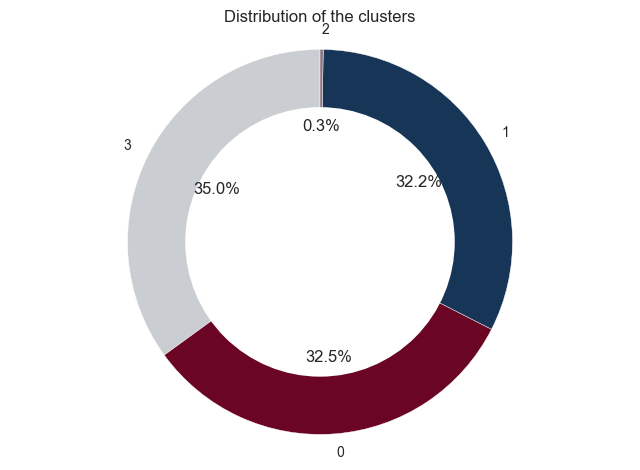

In [41]:
cluster_counts = data['Clusters'].value_counts()
labels = cluster_counts.index
sizes = cluster_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#caced3', '#6a0523', '#173557', '#8a7786'], wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title("Distribution of the clusters")
plt.show()


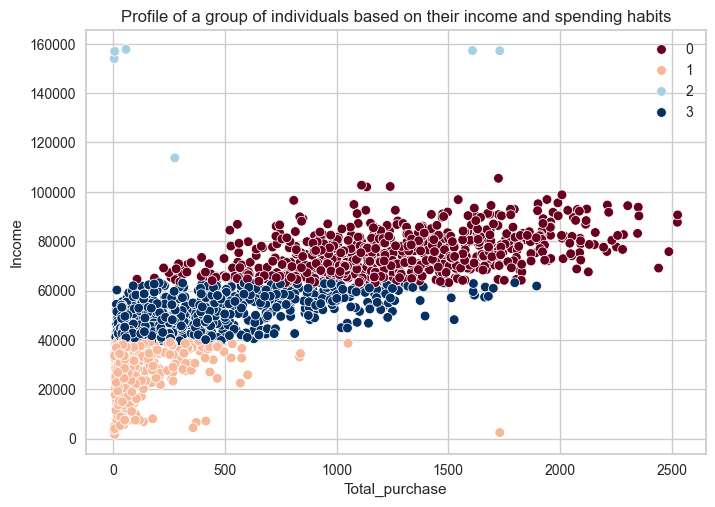

In [42]:
# Profile of a group of individuals based on their income and spending habits
sns.scatterplot(data=data, x="Total_purchase", y="Income", hue="Clusters", palette="RdBu")
plt.title("Profile of a group of individuals based on their income and spending habits")
plt.legend()
plt.show()

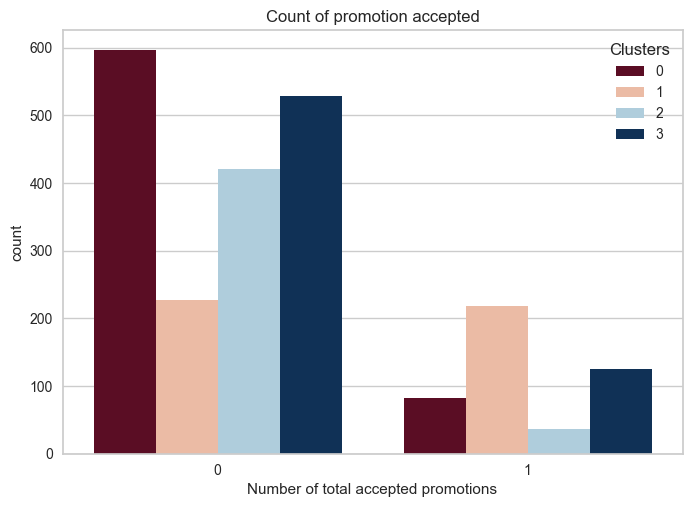

In [83]:
# Plotting count of total campaign accepted
plt.figure()
fig = sns.countplot(data=data, x="Cmp_Attitude", hue="Clusters", palette="RdBu")
fig.set_title("Count of promotion accepted")
fig.set_xlabel("Number of total accepted promotions")
#fig.set_xticklabels([])  # Hide x-axis labels
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/1045148116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="NumDealsPurchases", palette="RdBu")


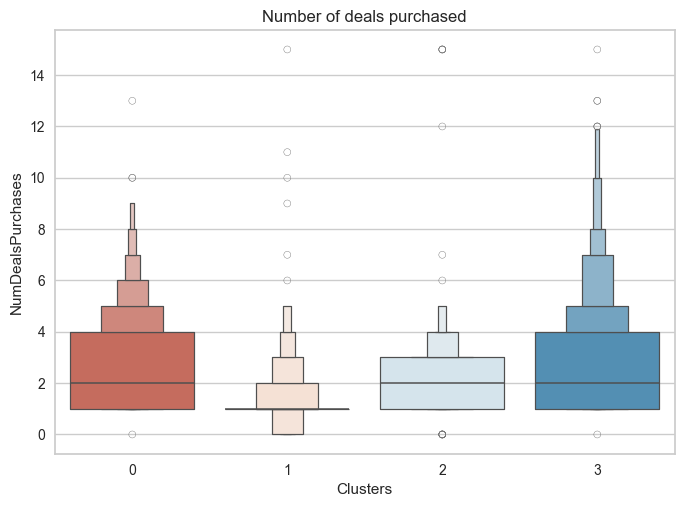

In [84]:
# Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="NumDealsPurchases", palette="RdBu")
pl.set_title("Number of deals purchased")
plt.show()

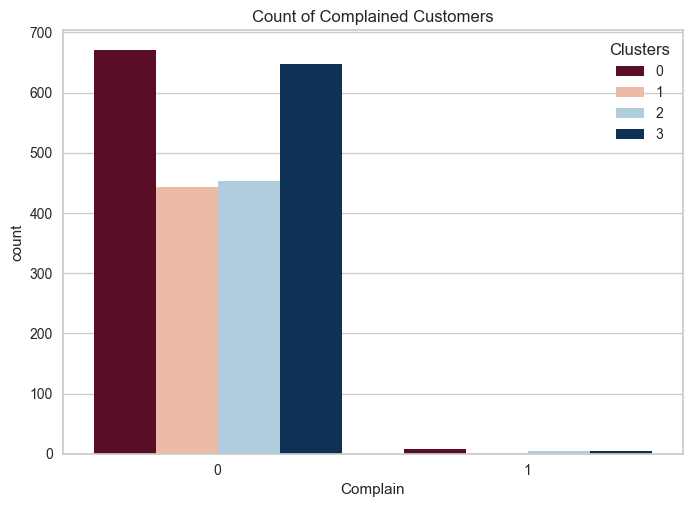

In [85]:
# Plotting the complain
plt.figure()
pl = sns.countplot(data=data, x="Complain", hue="Clusters", palette="RdBu")
pl.set_title("Count of Complained Customers")
plt.show()

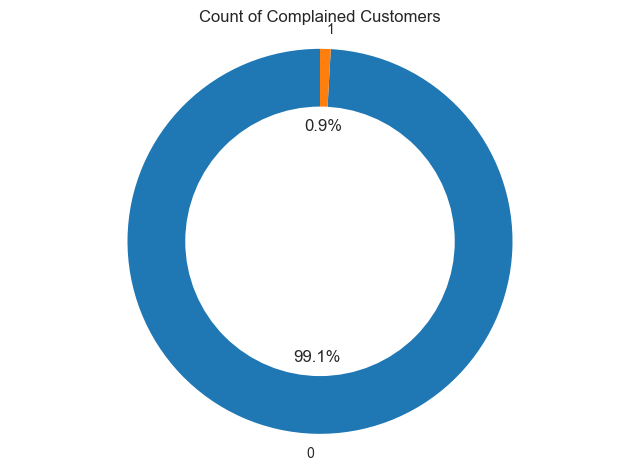

In [86]:
plt.figure()
complain_counts = data['Complain'].value_counts()
plt.pie(complain_counts, labels=complain_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title("Count of Complained Customers")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.axis('equal')
plt.show()


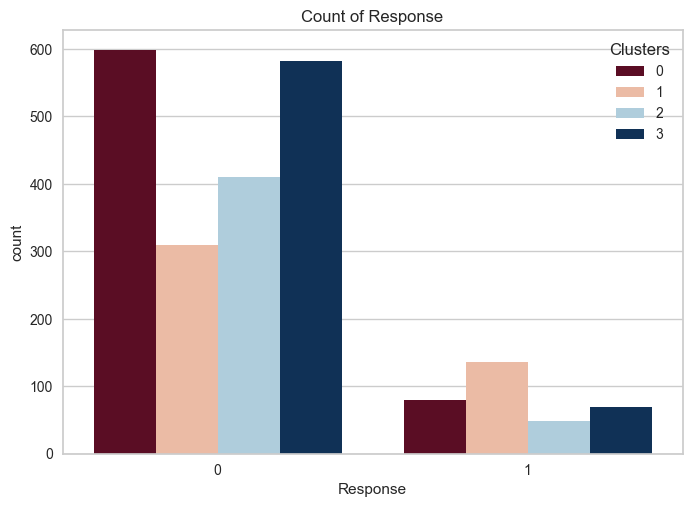

In [87]:
# Plotting the Response
plt.figure()
pl = sns.countplot(data=data, x="Response", hue="Clusters", palette="RdBu")
pl.set_title("Count of Response")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/2249610814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="Total_purchase", palette="RdBu")


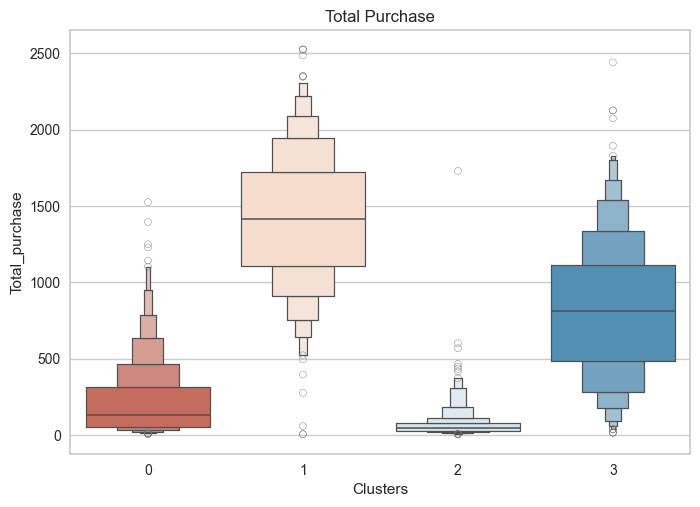

In [88]:
# Plotting the marriage
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="Total_purchase", palette="RdBu")
pl.set_title("Total Purchase")
plt.show()

In [89]:
cluster_iqr = data.groupby('Clusters')['Total_purchase'].describe()[['25%', '75%']]
print(cluster_iqr)


             25%     75%
Clusters                
0           54.0   318.0
1         1105.0  1724.0
2           31.0    77.0
3          484.0  1115.0


/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/297462132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="Family_Size", palette="RdBu")


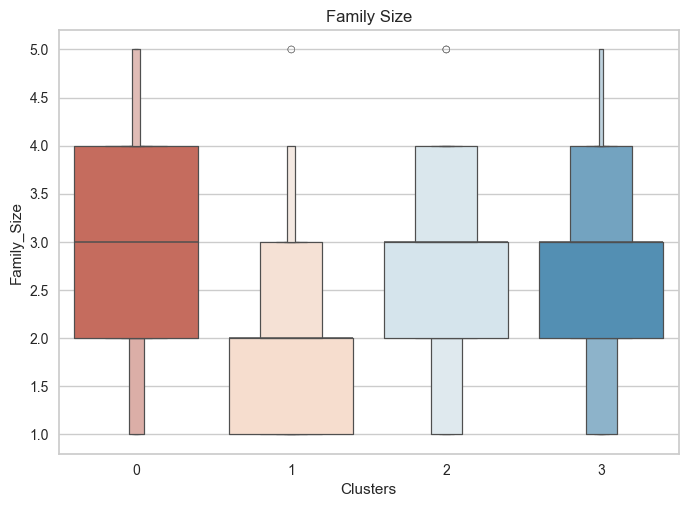

In [90]:
# Plotting the marriage
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="Family_Size", palette="RdBu")
pl.set_title("Family Size")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/1808697897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="Income", palette="RdBu")


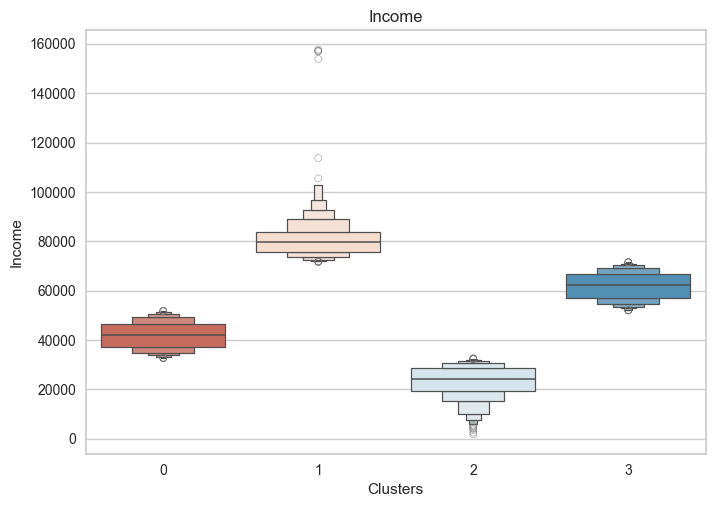

In [91]:
# Plotting the income
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="Income", palette="RdBu")
pl.set_title("Income")
plt.show()

In [92]:
cluster_iqr = data.groupby('Clusters')['Income'].describe()[['25%', '75%']]
print(cluster_iqr)

              25%       75%
Clusters                   
0         37085.5  46508.75
1         75507.0  83844.00
2         19363.0  28632.00
3         57100.0  66636.00


/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/2406026959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="Age", palette="RdBu")


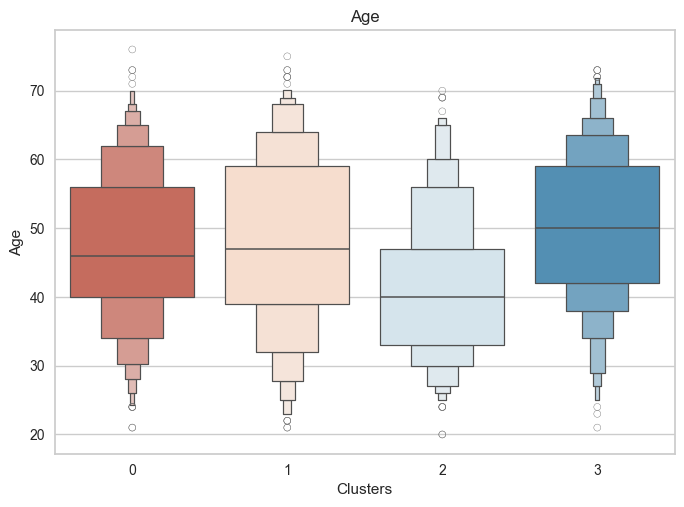

In [93]:
# Plotting the Age
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="Age", palette="RdBu")
pl.set_title("Age")
plt.show()

In [94]:
cluster_iqr = data.groupby('Clusters')['Age'].describe()[['25%', '75%']]
print(cluster_iqr)

           25%   75%
Clusters            
0         40.0  56.0
1         39.0  59.0
2         33.0  47.0
3         42.0  59.0


/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/3486509563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="Member_Year", palette="RdBu")


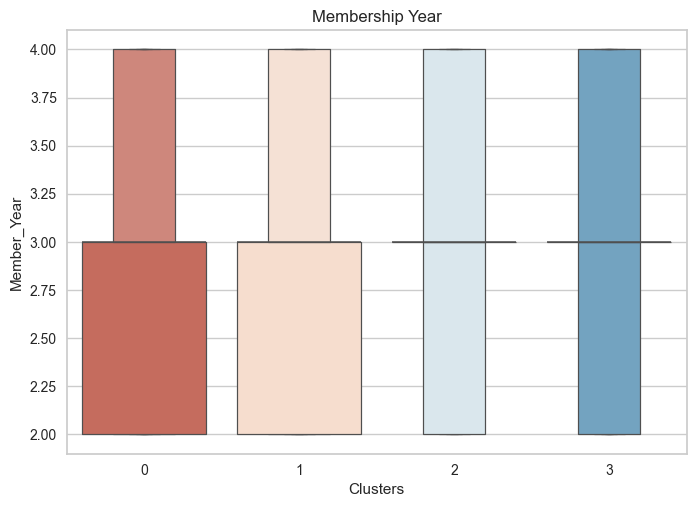

In [95]:
# Plotting the Member_Year
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="Member_Year", palette="RdBu")
pl.set_title("Membership Year")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/1463858457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="Recency", palette="RdBu")


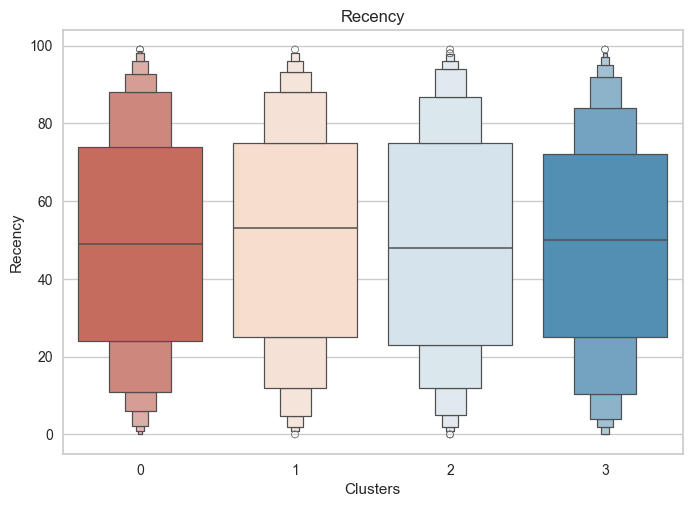

In [96]:
# Plotting the Recency
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="Recency", palette="RdBu")
pl.set_title("Recency")
plt.show()

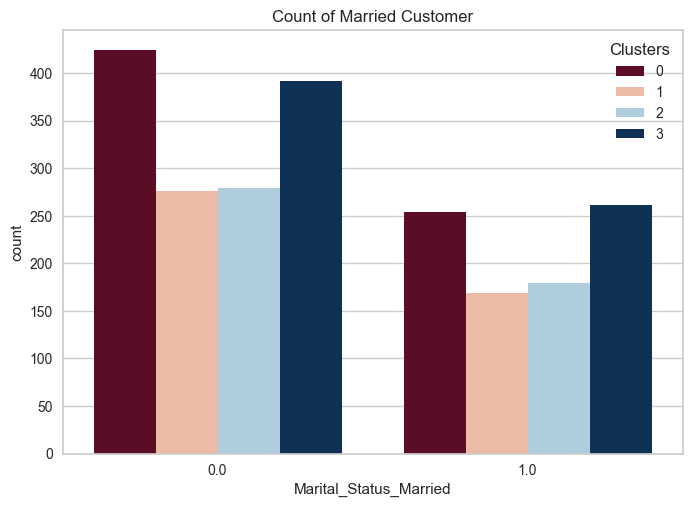

In [97]:
# Plotting the Marital_Status_Married
plt.figure()
pl = sns.countplot(data=data, x="Marital_Status_Married", hue="Clusters", palette="RdBu")
pl.set_title("Count of Married Customer")
plt.show()

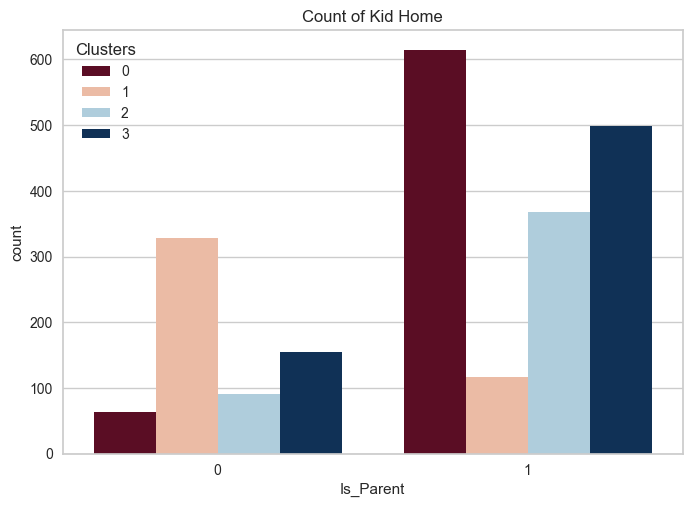

In [100]:
# Plotting the KidHome
plt.figure()
pl = sns.countplot(data=data, x="Is_Parent", hue="Clusters", palette="RdBu")
pl.set_title("Count of Kid Home")
plt.show()

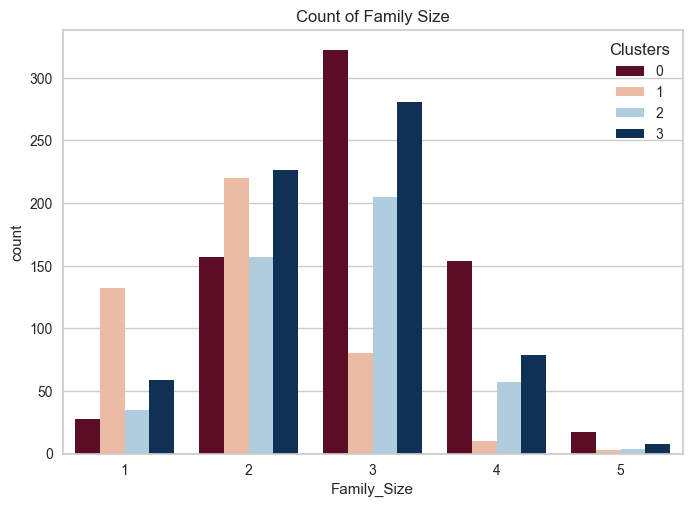

In [102]:
# Plotting the Teenhome
plt.figure()
pl = sns.countplot(data=data, x="Family_Size", hue="Clusters", palette="RdBu")
pl.set_title("Count of Family Size")
plt.show()

In [ ]:
# Plotting the MntWines
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="MntWines", palette="RdBu")
pl.set_title("Amount Wines Purchased")
plt.show()

ValueError: Could not interpret value `MntWines` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting the MntFruits
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="MntFruits", palette="RdBu")
pl.set_title("Amount Fruits Purchased")
plt.show()

ValueError: Could not interpret value `MntFruits` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting the MntMeatProducts
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="MntMeatProducts", palette="RdBu")
pl.set_title("Amount Meat Products Purchased")
plt.show()

ValueError: Could not interpret value `MntMeatProducts` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting the MntFishProducts
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="MntFishProducts", palette="RdBu")
pl.set_title("Amount Fish Purchased")
plt.show()

ValueError: Could not interpret value `MntFishProducts` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x550 with 0 Axes>

In [103]:
# Plotting the MntSweetProducts
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="MntSweetProducts", palette="RdBu")
pl.set_title("Amount Sweet Purchased")
plt.show()

ValueError: Could not interpret value `MntSweetProducts` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x550 with 0 Axes>

In [104]:
# Plotting the MntGoldProds
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="MntGoldProds", palette="RdBu")
pl.set_title("Amount Gold Products Purchased")
plt.show()

ValueError: Could not interpret value `MntGoldProds` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x550 with 0 Axes>

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/1478044561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="NumWebPurchases", palette="RdBu")


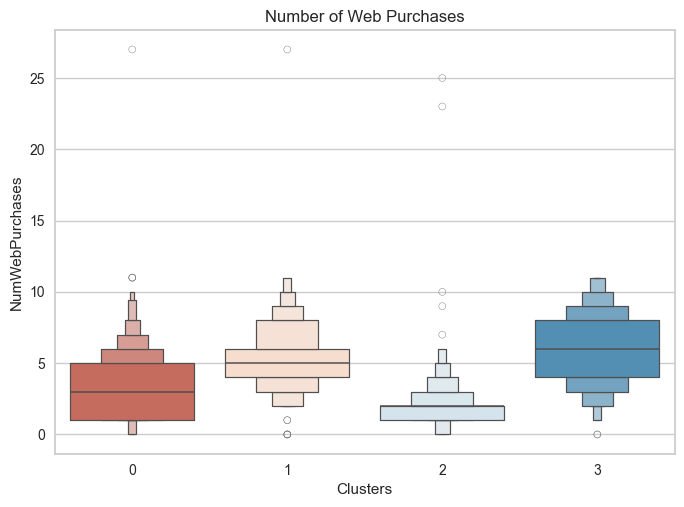

In [105]:
# Plotting the NumWebPurchases
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="NumWebPurchases", palette="RdBu")
pl.set_title("Number of Web Purchases")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/1599984901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="NumStorePurchases", palette="RdBu")


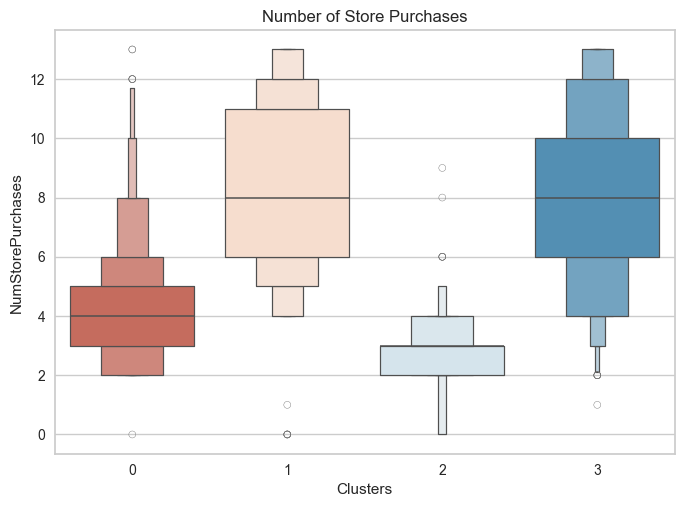

In [106]:
# Plotting the NumStorePurchases
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="NumStorePurchases", palette="RdBu")
pl.set_title("Number of Store Purchases")
plt.show()

In [107]:
data["PercentWebpurchases"]= (data["NumWebPurchases"] / (data["NumWebPurchases"] + data["NumStorePurchases"])) * 100

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/3502591013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="PercentWebpurchases", palette="RdBu")


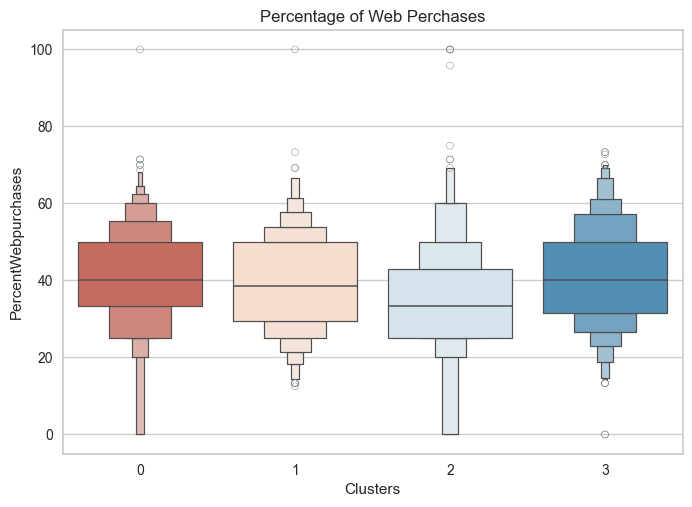

In [108]:
# Plotting the PercentWebpurchases
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="PercentWebpurchases", palette="RdBu")
pl.set_title("Percentage of Web Perchases")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/235597119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="NumCatalogPurchases", palette="RdBu")


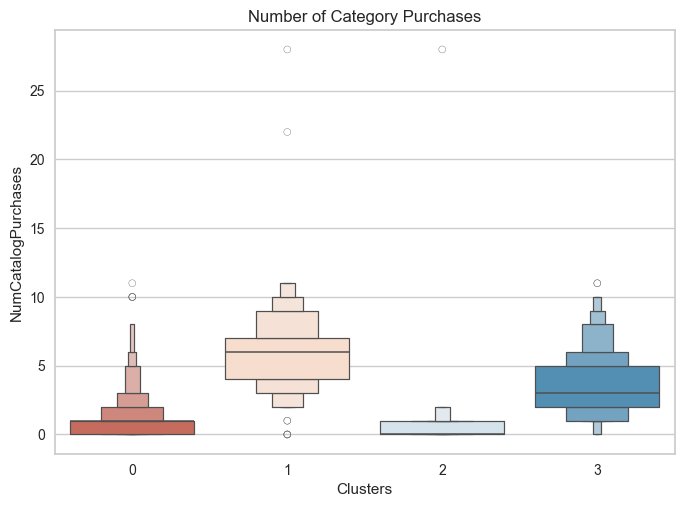

In [109]:
# Plotting the NumCatalogPurchases
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="NumCatalogPurchases", palette="RdBu")
pl.set_title("Number of Category Purchases")
plt.show()

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_58518/1749800516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(data=data, x="Clusters", y="NumWebVisitsMonth", palette="RdBu")


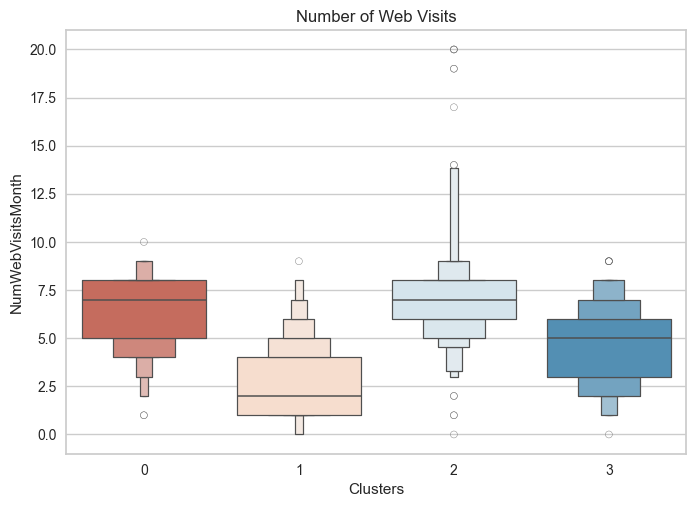

In [110]:
# Plotting the NumWebVisitsMonth
plt.figure()
pl = sns.boxenplot(data=data, x="Clusters", y="NumWebVisitsMonth", palette="RdBu")
pl.set_title("Number of Web Visits")
plt.show()